In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from xgboost import XGBClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt


# Reading dataset

In [5]:
loans_df = pd.read_csv('LoansTrainingSetV2.csv')
loans_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Loan Refused,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Loan Refused,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Loan Refused,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Loan Refused,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Loan Refused,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [6]:
loans_df.shape

(111107, 19)

In [7]:
# investigating data types
loans_df.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Years in current job             object
Home Ownership                   object
Annual Income                   float64
Purpose                          object
Monthly Debt                     object
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit              object
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [8]:
# Investigating percentage of missing data
100 * loans_df.isna().sum() / loans_df.shape[0]

Loan ID                          0.000000
Customer ID                      0.000000
Loan Status                      0.000000
Current Loan Amount              0.000000
Term                             0.000000
Credit Score                    19.204911
Years in current job             4.223856
Home Ownership                   0.000000
Annual Income                   19.204911
Purpose                          0.000000
Monthly Debt                     0.000000
Years of Credit History          0.000000
Months since last delinquent    53.104665
Number of Open Accounts          0.000000
Number of Credit Problems        0.000000
Current Credit Balance           0.000000
Maximum Open Credit              0.000000
Bankruptcies                     0.205208
Tax Liens                        0.009900
dtype: float64

In [9]:
# dropping id columns, since they will not be useful for predictions
loans_df = loans_df.drop(columns=['Loan ID',  'Customer ID'])
loans_df

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Loan Refused,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,Loan Refused,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,Loan Refused,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,Loan Refused,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,Loan Refused,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111102,Loan Given,15654,Long Term,686.0,10+ years,Rent,43050.0,Debt Consolidation,889.69,14.1,49.0,18,0,14730,29757,0.0,0.0
111103,Loan Given,15237,Short Term,706.0,10+ years,Home Mortgage,60948.0,Debt Consolidation,700.9,15.9,48.0,11,0,17733,23060,0.0,0.0
111104,Loan Given,10413,Short Term,719.0,5 years,Home Mortgage,66945.0,Debt Consolidation,1210.59,8.7,NaN,11,0,5205,6348,0.0,0.0
111105,Loan Given,34447,Short Term,626.0,10+ years,Home Mortgage,78736.0,Debt Consolidation,1476.3,30.4,9.0,12,0,32318,37580,0.0,0.0


In [10]:
# encoding target column as integers
target_encoder = OrdinalEncoder()
loans_df['Loan Status'] = target_encoder.fit_transform(loans_df['Loan Status'].values.reshape(-1, 1))

In [11]:
loans_df['Loan Status'].unique()

array([1., 0.])

In [12]:
print(f"encoded values: {loans_df['Loan Status'].unique()}")
print(f"correspondent labels: {target_encoder.inverse_transform(loans_df['Loan Status'].unique().reshape(-1, 1))}")

encoded values: [1. 0.]
correspondent labels: [['Loan Refused']
 ['Loan Given']]


### fixing data types

Maximum Open Credit

In [13]:
ftr = loans_df['Maximum Open Credit'] ==  '#VALUE!'
loans_df.loc[ftr, 'Maximum Open Credit'] = np.nan

In [14]:
loans_df['Maximum Open Credit'] = loans_df['Maximum Open Credit'].astype('float64')

Monthly Debt

In [15]:
loans_df['Monthly Debt'] = loans_df['Monthly Debt'].str.replace('$', '')
loans_df['Monthly Debt'] = loans_df['Monthly Debt'].astype('float64')

## Investigating numeric columns


In [16]:
numeric_columns = loans_df.columns[loans_df.dtypes != 'object'].tolist()

In [17]:
loans_df[numeric_columns].corr()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Loan Status,1.000000,-0.194753,0.466597,-0.054996,0.014328,-0.024448,-0.013303,0.012654,0.001476,-0.009264,-0.007948,-0.007939,0.010240
Current Loan Amount,-0.194753,1.000000,-0.096565,0.010673,-0.007095,0.018193,0.009815,0.000084,-0.001904,0.001862,-0.001424,-0.000676,0.000127
Credit Score,0.466597,-0.096565,1.000000,-0.019999,0.003615,-0.010127,-0.002741,0.005579,-0.001948,-0.001758,-0.003071,-0.005786,0.005155
Annual Income,-0.054996,0.010673,-0.019999,1.000000,0.421938,0.163397,-0.075919,0.148766,-0.015702,0.311503,0.053650,-0.048532,0.042600
Monthly Debt,0.014328,-0.007095,0.003615,0.421938,1.000000,0.193112,-0.057482,0.410981,-0.052459,0.475890,0.035658,-0.078927,0.022317
Years of Credit History,-0.024448,0.018193,-0.010127,0.163397,0.193112,1.000000,-0.042866,0.132027,0.062915,0.207137,0.032039,0.066311,0.019959
Months since last delinquent,-0.013303,0.009815,-0.002741,-0.075919,-0.057482,-0.042866,1.000000,-0.032356,0.105628,-0.027322,-0.009639,0.126004,0.011661
Number of Open Accounts,0.012654,0.000084,0.005579,0.148766,0.410981,0.132027,-0.032356,1.000000,-0.013996,0.227014,0.032530,-0.024052,0.006841
Number of Credit Problems,0.001476,-0.001904,-0.001948,-0.015702,-0.052459,0.062915,0.105628,-0.013996,1.000000,-0.111938,-0.012652,0.752255,0.585772
Current Credit Balance,-0.009264,0.001862,-0.001758,0.311503,0.475890,0.207137,-0.027322,0.227014,-0.111938,1.000000,0.142420,-0.122544,-0.015476


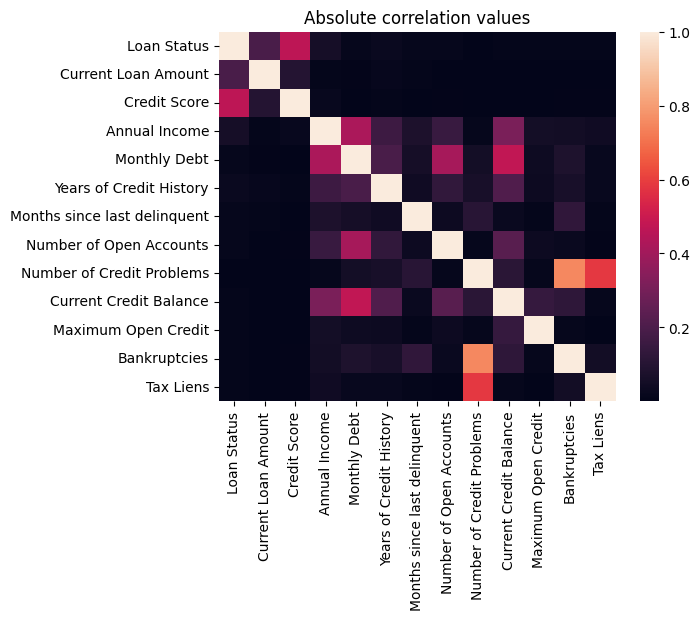

In [18]:
sns.heatmap(loans_df[numeric_columns].corr().abs())
plt.title('Absolute correlation values')
plt.show()

### OBS: From the below graph, we can infer that loan amount, credit score and annual income might help predicting the target variable

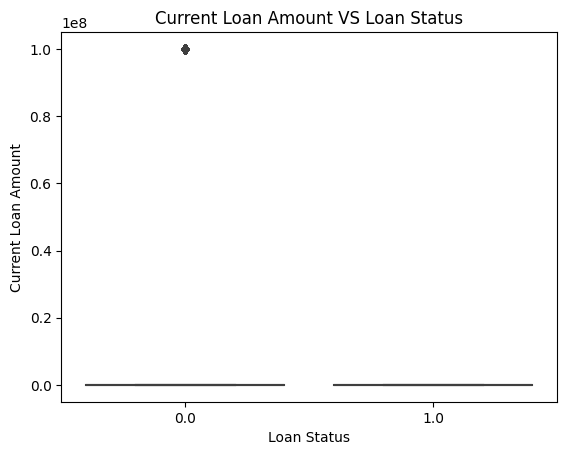

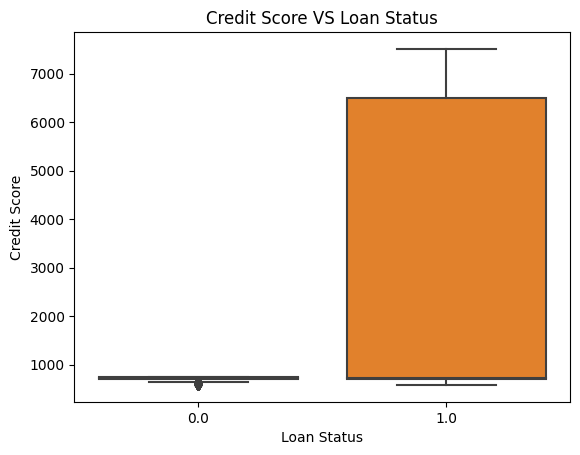

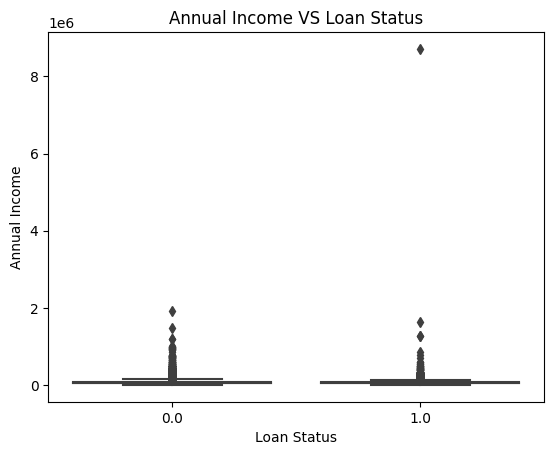

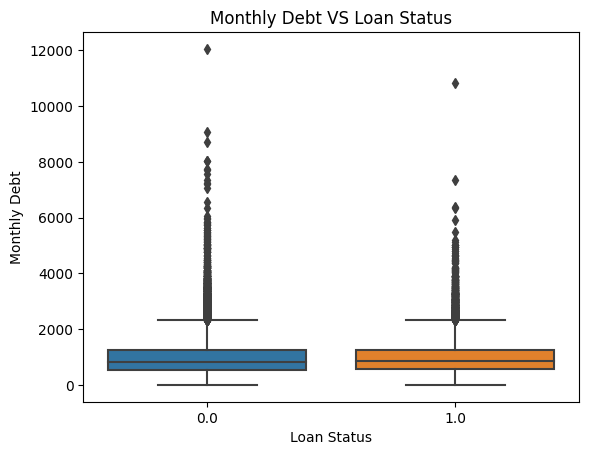

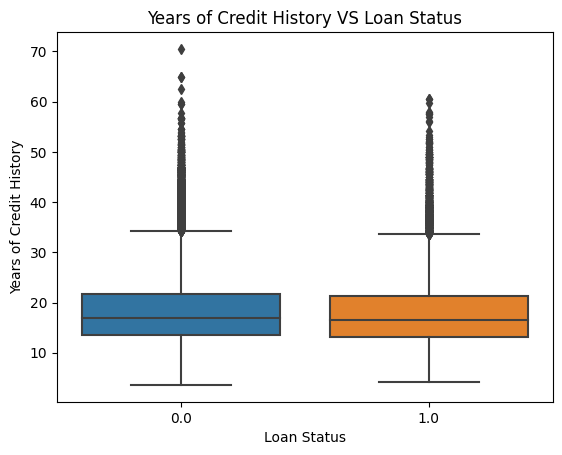

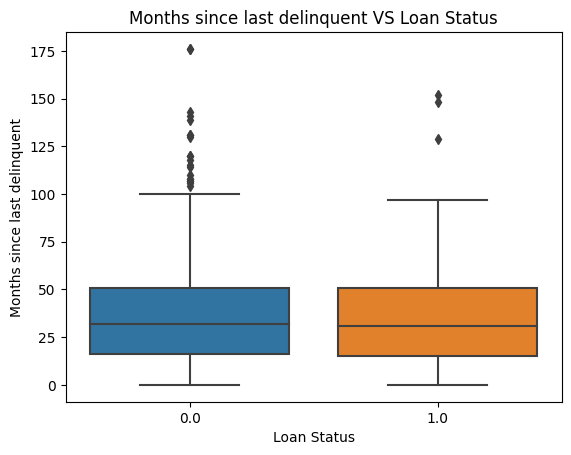

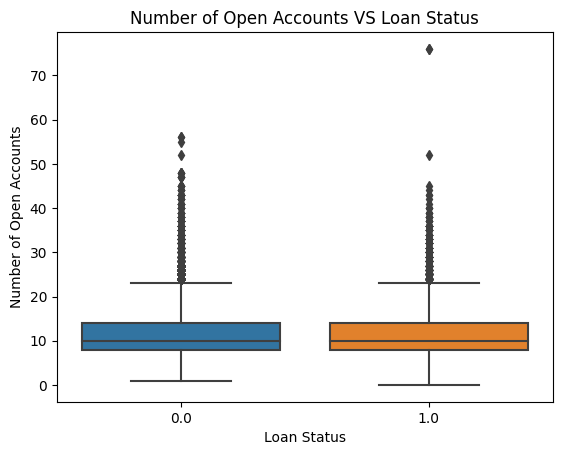

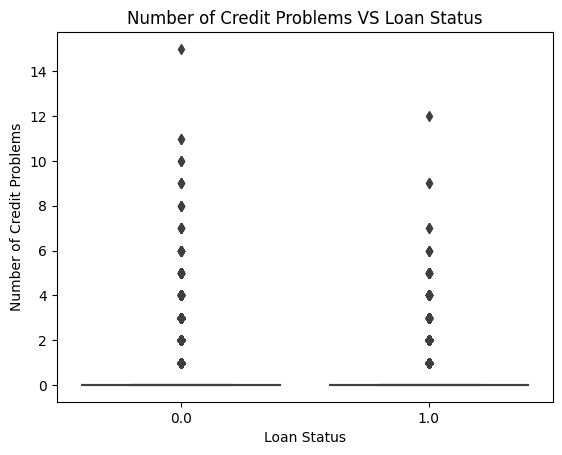

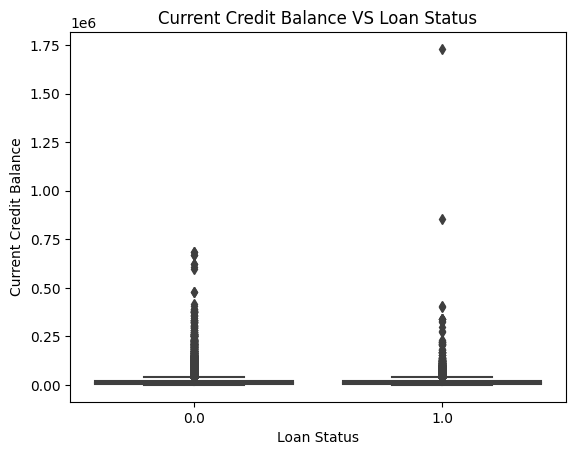

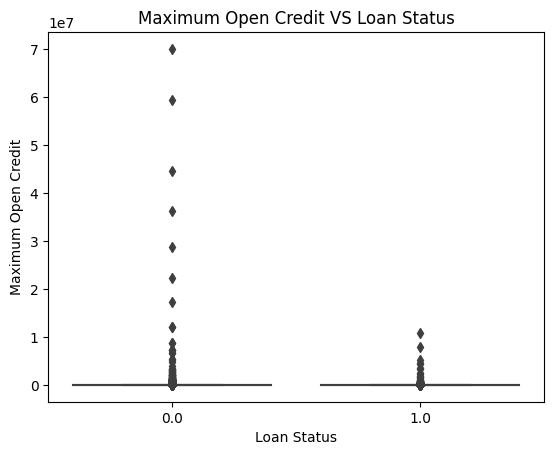

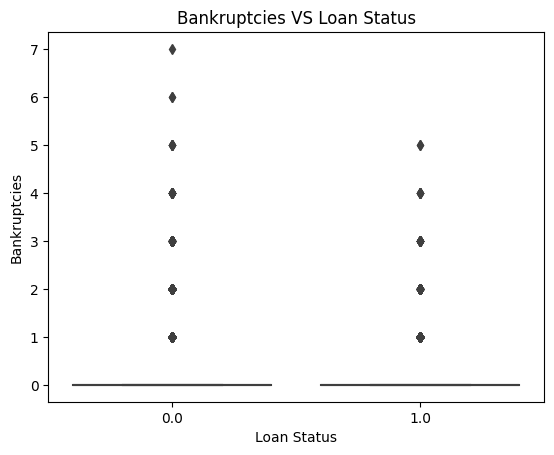

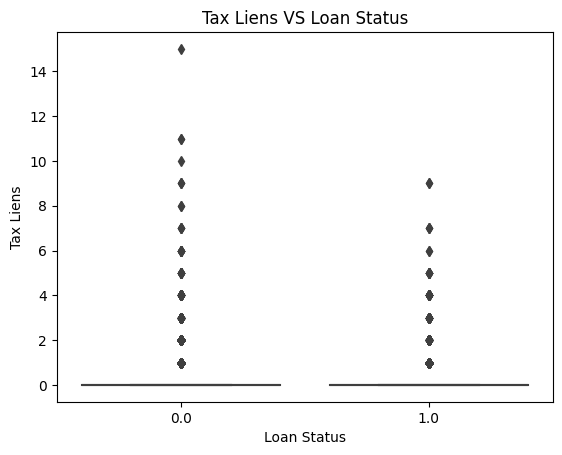

In [19]:
for col in numeric_columns[1:]:
    sns.boxplot(loans_df, y=col, x='Loan Status')
    plt.title(f'{col} VS Loan Status')
    # plt.yscale('log')
    plt.show()

# Investigating categorical Features

In [20]:
cat_cols = loans_df.columns[loans_df.dtypes == 'object']
loans_df[cat_cols]

,Term,Years in current job,Home Ownership,Purpose
0,Short Term,< 1 year,Rent,Debt Consolidation
1,Long Term,10+ years,Home Mortgage,Debt Consolidation
2,Short Term,9 years,Home Mortgage,Home Improvements
3,Short Term,3 years,Rent,Debt Consolidation
4,Long Term,10+ years,Home Mortgage,Home Improvements
...,...,...,...,...
111102,Long Term,10+ years,Rent,Debt Consolidation
111103,Short Term,10+ years,Home Mortgage,Debt Consolidation
111104,Short Term,5 years,Home Mortgage,Debt Consolidation
111105,Short Term,10+ years,Home Mortgage,Debt Consolidation


In [21]:
cat_encoder = OrdinalEncoder()
loans_df[cat_cols] = cat_encoder.fit_transform(loans_df[cat_cols])

In [22]:
cat_cols = cat_cols.tolist()
cat_cols.append('Loan Status')
loans_df[cat_cols].corr()

,Term,Years in current job,Home Ownership,Purpose,Loan Status
Term,1.000000,0.025163,0.116513,0.052720,-0.109398
Years in current job,0.025163,1.000000,0.079276,0.005246,0.013902
Home Ownership,0.116513,0.079276,1.000000,0.028287,0.052922
Purpose,0.052720,0.005246,0.028287,1.000000,-0.000185
Loan Status,-0.109398,0.013902,0.052922,-0.000185,1.000000


These columns also doesn't seem to be highly correlated with the target variable

In [23]:
loans_df.dtypes

Loan Status                     float64
Current Loan Amount               int64
Term                            float64
Credit Score                    float64
Years in current job            float64
Home Ownership                  float64
Annual Income                   float64
Purpose                         float64
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

# Modeling

In [24]:
X, y= loans_df.drop(columns=['Loan Status']), loans_df['Loan Status'].values.reshape(-1, 1)
X.shape, y.shape

((111107, 16), (111107, 1))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

vanilla xgboost (base model):

In [26]:
clf = XGBClassifier(objective='binary:logistic', n_jobs=-1, random_state=42, verbose=0)
clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])
y_pred = clf.predict(X_test)

[14:20:59] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-logloss:0.57238
[1]	validation_0-logloss:0.50786
[2]	validation_0-logloss:0.47010
[3]	validation_0-logloss:0.44698
[4]	validation_0-logloss:0.43269
[5]	validation_0-logloss:0.42328
[6]	validation_0-logloss:0.41686
[7]	validation_0-logloss:0.41240
[8]	validation_0-logloss:0.40935
[9]	validation_0-logloss:0.40730
[10]	validation_0-logloss:0.40552
[11]	validation_0-logloss:0.40435
[12]	validation_0-logloss:0.40324
[13]	validation_0-logloss:0.40229
[14]	validation_0-logloss:0.40168
[15]	validation_0-logloss:0.40139
[16]	validation_0-logloss:0.40089
[17]	validation_0-logloss:0.40056
[18]	validation_0-logloss:0.40028
[19]	validation_0-logloss:0.39996
[20]	validation_0-logloss:0.39991
[21]	validation_0-logloss:0.39993
[22]	validation_0-logloss:0.39978
[23]	validation_0-logloss:0.39971
[24]	validation_0-logloss:0.39959
[25]	validation_0-logloss:0.39949
[26]	validation_0-logloss:0.39946
[27]	va

In [27]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print(f'Classification Report:\n', classification_report(y_test, y_pred))

Accuracy Score: 0.8214832148321484
Confusion Matrix:
 [[16757   430]
 [ 3537  1498]]


Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.97      0.89     17187
         1.0       0.78      0.30      0.43      5035

    accuracy                           0.82     22222
   macro avg       0.80      0.64      0.66     22222
weighted avg       0.81      0.82      0.79     22222



### saving model artifacts

In [29]:
X.columns

Index(['Current Loan Amount', 'Term', 'Credit Score', 'Years in current job',
       'Home Ownership', 'Annual Income', 'Purpose', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')

In [31]:
len(X.columns)

16

In [28]:
clf.save_model('booster_vanilla.bst')
joblib.dump(cat_encoder, 'cat_encoder.joblib')
joblib.dump(target_encoder, 'target_encoder.joblib')
joblib.dump(X.columns.tolist(), 'inference_columns.joblib')

['target_encoder.joblib']